In [1]:
!pip install tensorflow

In [2]:
# loading required libs

import tensorflow as tf
import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2023-12-01 06:28:37.647600: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 06:28:37.716740: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 06:28:37.716814: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 06:28:37.718379: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 06:28:37.727672: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 06:28:37.728332: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
# Checking the version of TensorFlow and Keras

print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")

TensorFlow Version: 2.15.0
Keras Version: 2.15.0


In [4]:
df =  pd.read_csv("wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


## EDA 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
""" from the above analysis we can absorve that there is only one categorical 
col that is needed to be encoded for the model training 
"""

' from the above analysis we can absorve that there is only one categorical \ncol that is needed to be encoded for the model training \n'

In [9]:
df.quality.value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [10]:
# lets encoded the quality col

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df.quality = encoder.fit_transform(df.quality)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [11]:
df.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

Text(0.5, 1.0, 'Quality')

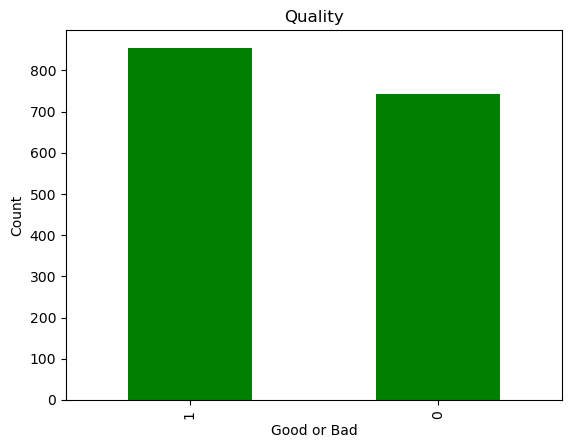

In [12]:
df.quality.value_counts().plot(kind='bar',color='green')
plt.xlabel("Good or Bad")
plt.ylabel("Count")
plt.title("Quality")

<AxesSubplot: >

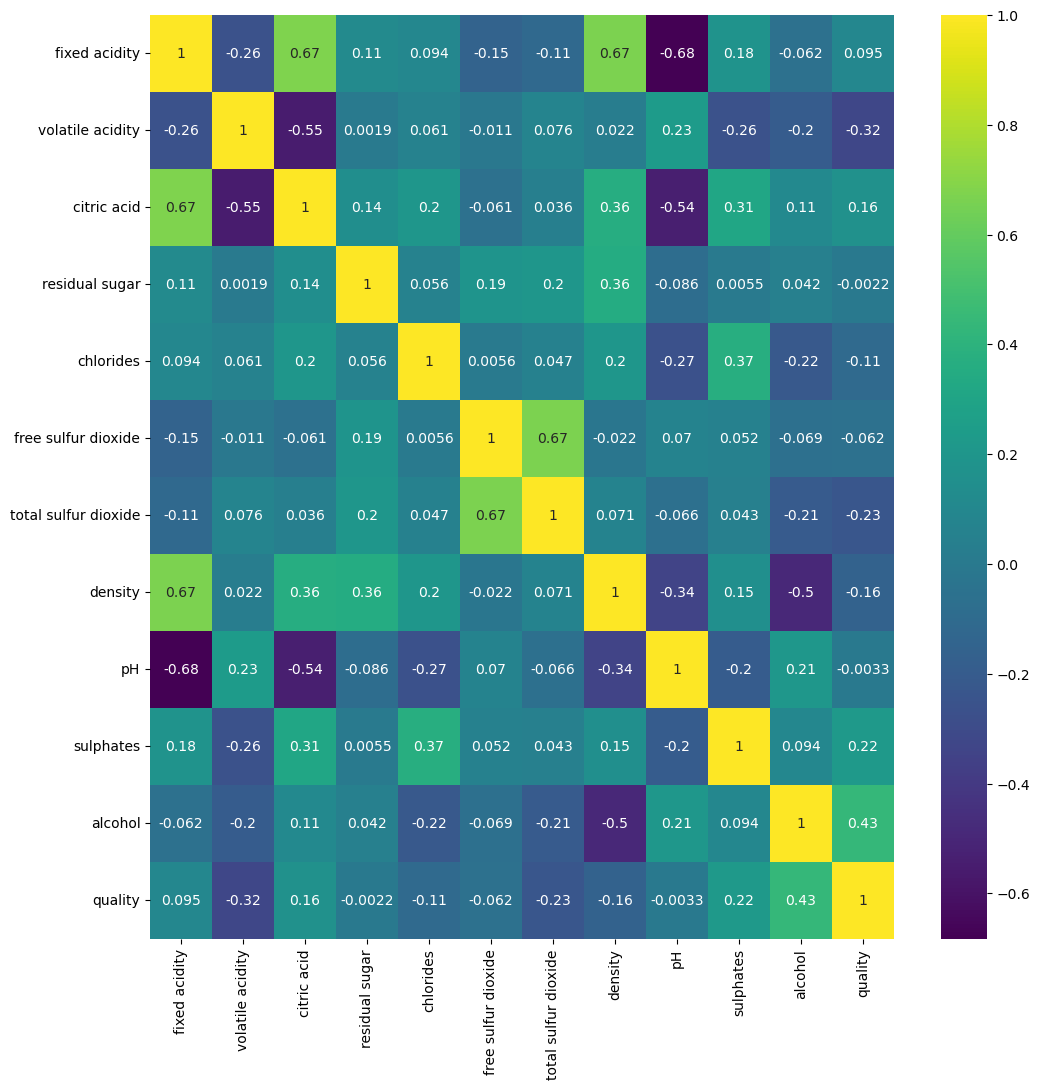

In [13]:
#Plotting the correlation matrix
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='viridis',annot=True)

In [14]:
# saprating the target and independent variable 

x = df.drop("quality", axis = 1)
y = df.quality

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
## splitting the data into train_full and test 

x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, random_state=42)

In [17]:
## splitting the data into train and validation

x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42) 


In [69]:
print(x_train_full.shape)
print(y_train_full.shape)

print(x_test.shape)
print(y_test.shape)

print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)


(1199, 11)
(1199,)
(400, 11)
(400,)
(899, 11)
(899,)
(300, 11)
(300,)


In [70]:
# lets scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_valid_scaled = scaler.fit_transform(x_valid)


In [71]:
# Creating the lay out

LAYERS = [tf.keras.layers.Flatten(input_shape=x_train.shape[1:], name="inputLayer"),
          tf.keras.layers.Dense(30, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(10, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(2, activation="sigmoid", name="outputLayer")
          ]

In [72]:
# Defining model
model_clf = tf.keras.models.Sequential(LAYERS)

In [73]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 11)                0         
                                                                 
 hiddenLayer1 (Dense)        (None, 30)                360       
                                                                 
 hiddenLayer2 (Dense)        (None, 10)                310       
                                                                 
 outputLayer (Dense)         (None, 2)                 22        
                                                                 
Total params: 692 (2.70 KB)
Trainable params: 692 (2.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
## model compilation 

LOSS = "sparse_categorical_crossentropy"
# OPTIMIZER = "ADAM"
OPTIMIZER = tf.keras.optimizers.Adam()
METRICS = ["accuracy"]

model_clf.compile( loss = LOSS,
                  optimizer= OPTIMIZER,
                  metrics=METRICS)

In [75]:
## Obtaining the model's parameters (weights and biases).

layer1 = model_clf.layers[1]

In [76]:
weights, biases = layer1.get_weights()

In [77]:
print("shape\n",weights.shape, "\n")
weights

shape
 (11, 30) 



array([[ 2.20851898e-02, -9.27102566e-02,  1.18252069e-01,
        -7.62949884e-02, -1.50880486e-01, -1.97493911e-01,
         8.34336877e-02,  1.48802429e-01,  1.15252197e-01,
         2.11150557e-01, -2.66709924e-01, -1.64503857e-01,
        -3.18832278e-01,  2.42983997e-02,  1.86192185e-01,
         3.32278997e-01,  1.76560134e-01,  3.29083771e-01,
        -3.61441761e-01, -4.68045771e-02, -2.84514189e-01,
         2.68132955e-01,  9.10740197e-02, -2.93285728e-01,
         1.28495693e-02, -5.85386157e-02,  7.89162517e-02,
         2.80882984e-01, -3.55680555e-01,  2.08212644e-01],
       [ 1.71679109e-01,  3.76786381e-01,  4.76803482e-02,
        -8.41823816e-02, -3.00600111e-01, -6.74738884e-02,
         3.49021226e-01,  2.77117163e-01, -2.39909664e-01,
        -2.94614792e-01, -3.69316310e-01, -1.15997255e-01,
        -9.70605910e-02,  3.75138193e-01,  2.04721987e-02,
        -3.17235112e-01,  2.10039109e-01, -2.25777835e-01,
         1.53982133e-01, -3.11625749e-01, -3.54649365e-

In [78]:
print("shape\n",biases.shape, "\n")
biases

shape
 (30,) 



array([[ 2.20851898e-02, -9.27102566e-02,  1.18252069e-01,
        -7.62949884e-02, -1.50880486e-01, -1.97493911e-01,
         8.34336877e-02,  1.48802429e-01,  1.15252197e-01,
         2.11150557e-01, -2.66709924e-01, -1.64503857e-01,
        -3.18832278e-01,  2.42983997e-02,  1.86192185e-01,
         3.32278997e-01,  1.76560134e-01,  3.29083771e-01,
        -3.61441761e-01, -4.68045771e-02, -2.84514189e-01,
         2.68132955e-01,  9.10740197e-02, -2.93285728e-01,
         1.28495693e-02, -5.85386157e-02,  7.89162517e-02,
         2.80882984e-01, -3.55680555e-01,  2.08212644e-01],
       [ 1.71679109e-01,  3.76786381e-01,  4.76803482e-02,
        -8.41823816e-02, -3.00600111e-01, -6.74738884e-02,
         3.49021226e-01,  2.77117163e-01, -2.39909664e-01,
        -2.94614792e-01, -3.69316310e-01, -1.15997255e-01,
        -9.70605910e-02,  3.75138193e-01,  2.04721987e-02,
        -3.17235112e-01,  2.10039109e-01, -2.25777835e-01,
         1.53982133e-01, -3.11625749e-01, -3.54649365e-

In [79]:
## model training 

EPOCHS = 10

VALIDATION_SET = (x_valid_scaled, y_valid)

history = model_clf.fit(x_train_scaled, y_train,
                        epochs=EPOCHS,
                        validation_data=VALIDATION_SET
                       )

Epoch 1/10
29/29 [==============================] - 1s 10ms/step - loss: 0.7251 - accuracy: 0.5128 - val_loss: 0.6531 - val_accuracy: 0.6233
Epoch 2/10
29/29 [==============================] - 0s 4ms/step - loss: 0.6451 - accuracy: 0.6474 - val_loss: 0.6084 - val_accuracy: 0.6833
Epoch 3/10
29/29 [==============================] - 0s 4ms/step - loss: 0.6044 - accuracy: 0.6952 - val_loss: 0.5823 - val_accuracy: 0.7133
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5725 - accuracy: 0.7253 - val_loss: 0.5658 - val_accuracy: 0.7267
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.7453 - val_loss: 0.5568 - val_accuracy: 0.7167
Epoch 6/10
29/29 [==============================] - 0s 4ms/step - loss: 0.5282 - accuracy: 0.7553 - val_loss: 0.5545 - val_accuracy: 0.7200
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5142 - accuracy: 0.7608 - val_loss: 0.5522 - val_accuracy: 0.7367
Epoch 8/10
29/29 [=

In [80]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.725064,0.512792,0.653091,0.623333
1,0.645129,0.647386,0.608426,0.683333
2,0.604353,0.695217,0.582296,0.713333
3,0.572469,0.725250,0.565781,0.726667
4,0.545623,0.745273,0.556755,0.716667
5,0.528184,0.755284,0.554489,0.720000
6,0.514181,0.760845,0.552174,0.736667
7,0.506300,0.765295,0.551948,0.746667
8,0.498041,0.776418,0.557192,0.730000
9,0.490938,0.766407,0.556732,0.733333


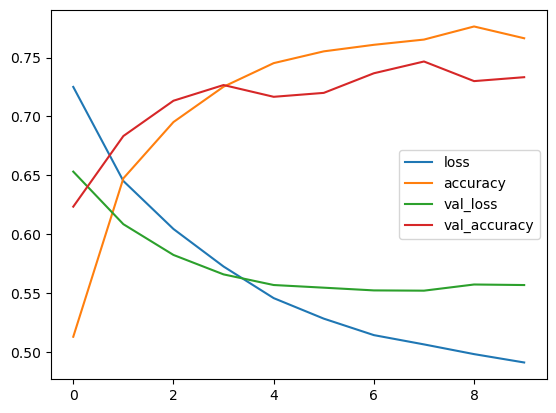

In [81]:
pd.DataFrame(history.history).plot();

In [82]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 29}

In [106]:
# Model Evaluation on whole test data

model_clf.evaluate(x_test_scaled, y_test)

13/13 [==============================] - 0s 1ms/step - loss: 0.5305 - accuracy: 0.7325


[0.530517041683197, 0.7325000166893005]

In [107]:
# prediction for new value 

x_new = x_test_scaled[:5]
actual = y_test[:5]

y_prob = model_clf.predict(x_new)

y_pred = np.argmax(y_prob, axis = -1)

1/1 [==============================] - 0s 28ms/step


/tmp/ipykernel_7363/4270786401.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  actual = y_test[:5]


In [108]:
actual

803     1
124     0
350     1
682     0
1326    1
Name: quality, dtype: int64

In [109]:
y_pred

array([0, 0, 1, 0, 1])

In [110]:
## performance matrix

from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(actual, y_pred))

[[2 0]
 [1 2]]


In [121]:
print(f"Accuracy Score : {accuracy_score(actual, y_pred)*100:.2f}%")

Accuracy Score : 80.00%
